# BBC021: Human MCF7 cells – compound-profiling experiment

In [1]:
# %load ../common_.py
import sys
sys.path.append("../..")
from common import *

In [2]:
from aicsimageio.readers.tiff_glob_reader import TiffGlobReader
import re
import cellpose
from cellpose import models
from skimage.measure import regionprops

In [3]:
data_dir = Path("/user/gent/420/vsc42015/vsc_data_vo/datasets/BBBC021")

In [5]:
data_dir = Path("/home/maximl/scratch/data/vsc/datasets/BBBC021")

In [4]:
batch = "Week5_28901"
name = "Week5_130707_F02_s3_w"

In [5]:
def map_to_index(f):
    idx = re.match("^.*_w([0-9]).*$", f).group(1)
    m = {"1": 0, "2": 1, "4": 2}
    return pandas.Series(
        dict(S=0, T=0, C=m[idx], Z=0)
    )

im = TiffGlobReader(
    glob_in=sorted([str(p) for p in data_dir.glob("images/%s/%s*.tif" % (batch, name))]),
    indexer=map_to_index,
    channel_names=["DAPI", "Actin", "Tubulin"]
)

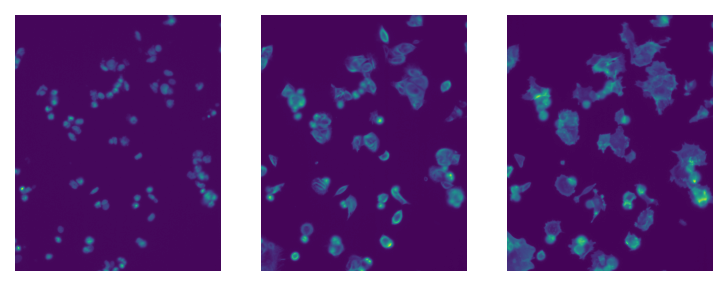

In [6]:
pixels = im.get_image_data("CXY")

fig, axes = plt.subplots(1, pixels.shape[0], dpi=150)
for ax, p in zip(axes, pixels):
    ax.imshow(p / p.reshape(1, -1).max(axis=1))
    ax.set_axis_off()

In [7]:
model = models.Cellpose(gpu=True, model_type='cyto2')

In [8]:
masks, flows, styles, diams = model.eval(pixels, diameter=None, channels=[2, 1])

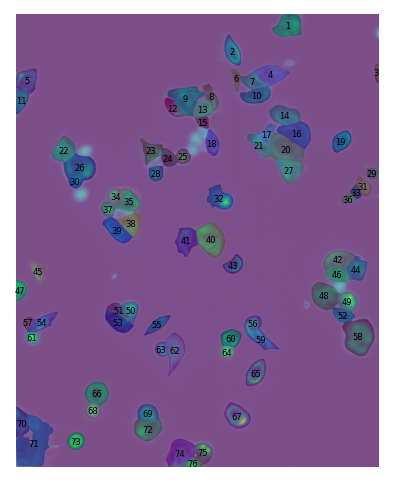

In [9]:
fig, ax = plt.subplots(1, 1, dpi=150)

ax.imshow((pixels / pixels.reshape(1, -1).max(axis=1))[1])
ax.set_axis_off()

ax.imshow(cellpose.plot.mask_rgb(masks), alpha=0.3)
for prop in regionprops(label_image=masks):
    ax.text(prop.centroid[1], prop.centroid[0], prop.label, fontsize=4, ha="center", va="center")

In [10]:
masks2, flows2, styles2, diams2 = model.eval(pixels, diameter=None, channels=[1, 1])

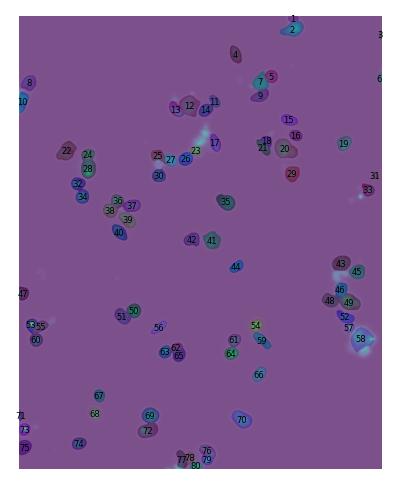

In [11]:
fig, ax = plt.subplots(1, 1, dpi=150)

ax.imshow((pixels / pixels.reshape(1, -1).max(axis=1))[0])
ax.set_axis_off()

ax.imshow(cellpose.plot.mask_rgb(masks2), alpha=0.3)
for prop in regionprops(label_image=masks2):
    ax.text(prop.centroid[1], prop.centroid[0], prop.label, fontsize=4, ha="center", va="center")

In [12]:
from scip.segmentation import cellpose
from cellpose import plot

In [13]:
from dask.distributed import Client, LocalCluster
import dask.bag

In [14]:
c = Client(LocalCluster(n_workers=1))

2022-09-01 17:23:38,843 - distributed.diskutils - INFO - Found stale lock file and directory '/kyukon/home/gent/420/vsc42015/projects/weizmann-ehv-analysis/notebooks/QC/dask-worker-space/worker-59e5scwg', purging
2022-09-01 17:23:38,848 - distributed.diskutils - INFO - Found stale lock file and directory '/kyukon/home/gent/420/vsc42015/projects/weizmann-ehv-analysis/notebooks/QC/dask-worker-space/worker-gwjbcjeg', purging


In [15]:
bag = dask.bag.from_sequence([dict(pixels=pixels)])

In [16]:
events = bag.map_partitions(cellpose.segment_block, parent_channel_index=1, dapi_channel_index=0).compute()

In [35]:
mask = events[0]["mask"]

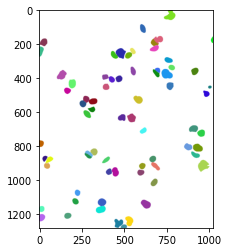

In [40]:
plt.imshow(plot.mask_rgb(mask[0]))

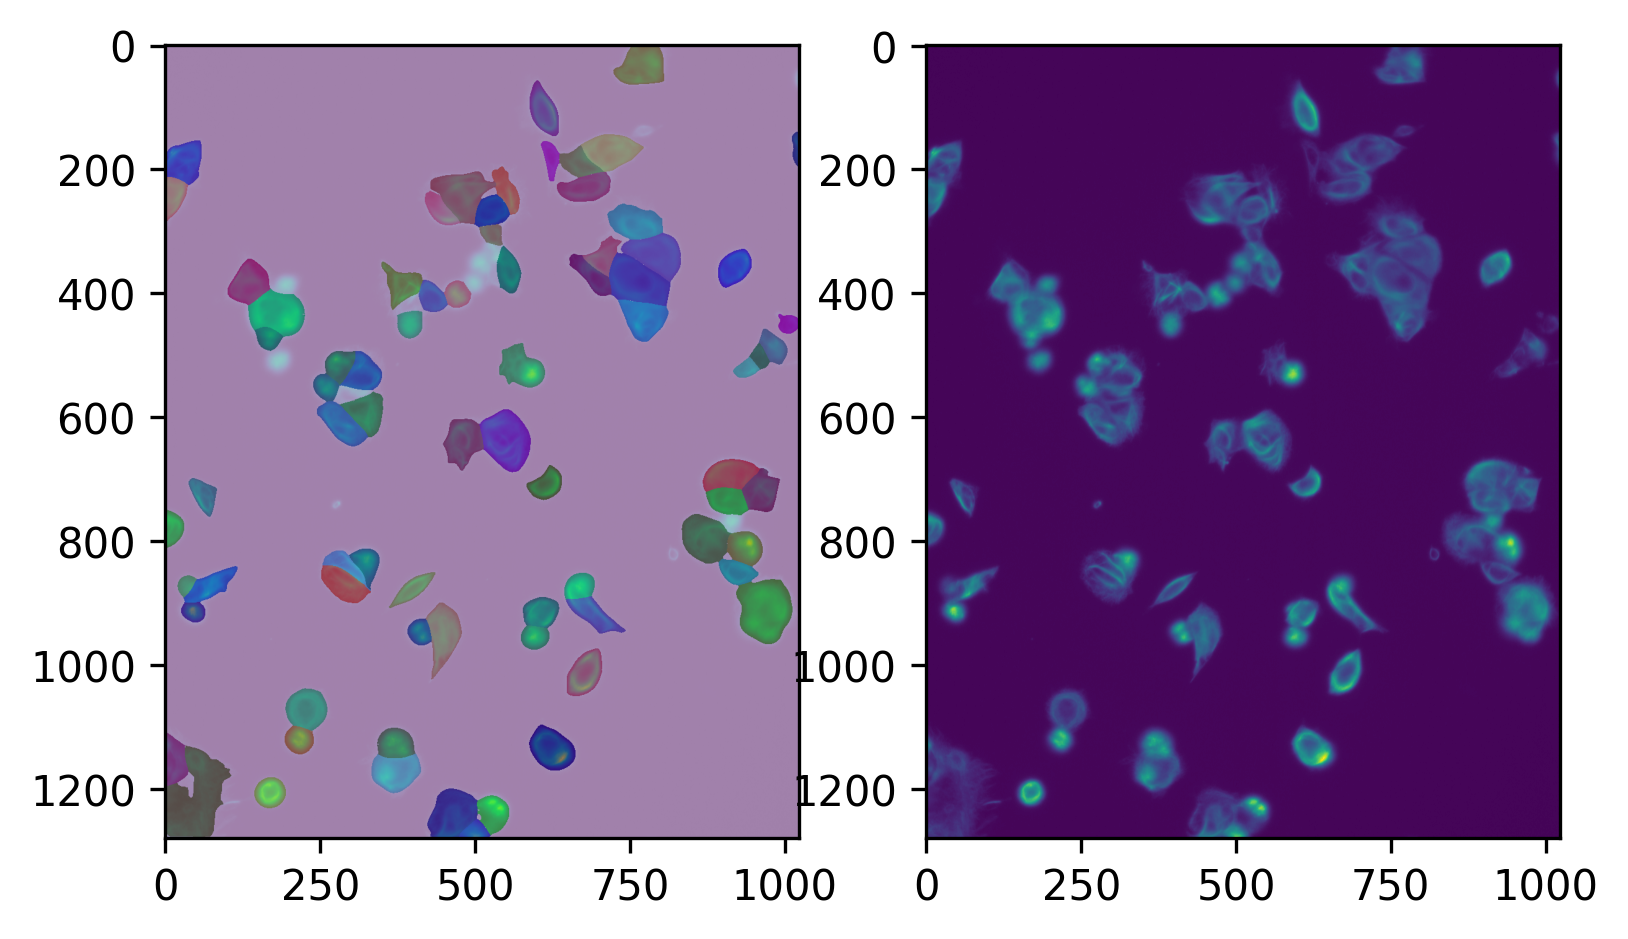

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, dpi=300)
ax2.imshow(pixels[1])
ax1.imshow(pixels[1])
ax1.imshow(plot.mask_rgb(mask[1]), alpha=.5)

In [16]:
masks2, flows2, styles2, diams2 = model.eval([pixels], diameter=None, channels=[2, 0], mask_threshold=0.2)

2022-05-23 11:42:55,089 [INFO] ~~~ ESTIMATING CELL DIAMETER(S) ~~~
2022-05-23 11:42:56,961 [WARNING] WARNING: not interp
2022-05-23 11:43:00,980 [INFO] estimated cell diameter(s) in 5.89 sec
2022-05-23 11:43:00,981 [INFO] >>> diameter(s) = 
2022-05-23 11:43:00,982 [INFO] [73.19, ]
2022-05-23 11:43:00,983 [INFO] ~~~ FINDING MASKS ~~~
2022-05-23 11:43:03,014 [INFO] >>>> TOTAL TIME 7.93 sec


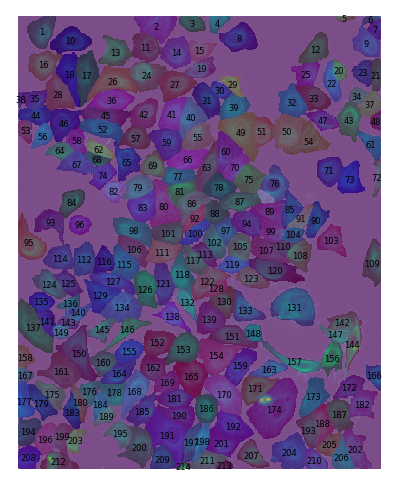

In [19]:
fig, ax = plt.subplots(1, 1, dpi=150)

ax.imshow((pixels / pixels.reshape(1, -1).max(axis=1))[1])
ax.set_axis_off()

ax.imshow(cellpose.plot.mask_rgb(masks2[0]), alpha=0.3)
for prop in regionprops(label_image=masks2[0]):
    ax.text(prop.centroid[1], prop.centroid[0], prop.label, fontsize=4, ha="center", va="center")

In [32]:
masks3, flows3, styles3, diams2 = model.eval([pixels[0]], diameter=None, channels=[0, 0], mask_threshold=0.2)

2022-05-23 13:40:53,640 [INFO] ~~~ ESTIMATING CELL DIAMETER(S) ~~~
2022-05-23 13:40:55,394 [WARNING] WARNING: not interp
2022-05-23 13:40:57,460 [INFO] estimated cell diameter(s) in 3.82 sec
2022-05-23 13:40:57,461 [INFO] >>> diameter(s) = 
2022-05-23 13:40:57,462 [INFO] [35.07, ]
2022-05-23 13:40:57,462 [INFO] ~~~ FINDING MASKS ~~~
2022-05-23 13:41:00,308 [INFO] >>>> TOTAL TIME 6.67 sec


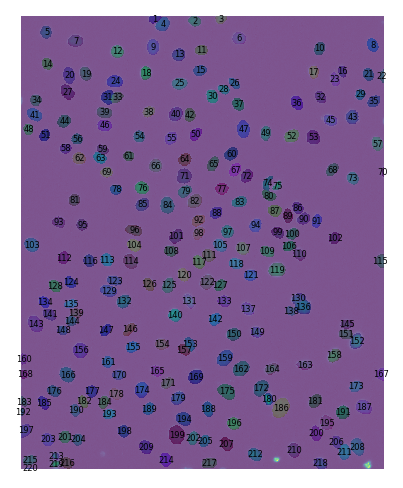

In [33]:
fig, ax = plt.subplots(1, 1, dpi=150)

ax.imshow((pixels / pixels.reshape(1, -1).max(axis=1))[0])
ax.set_axis_off()

ax.imshow(cellpose.plot.mask_rgb(masks3[0]), alpha=0.3)
for prop in regionprops(label_image=masks3[0]):
    ax.text(prop.centroid[1], prop.centroid[0], prop.label, fontsize=4, ha="center", va="center")